In [1]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

import numpy as np
import os

In [2]:
from GeoGuessrDataset import GeoGuessrDataset, ToTensor
%load_ext autoreload
%autoreload 2

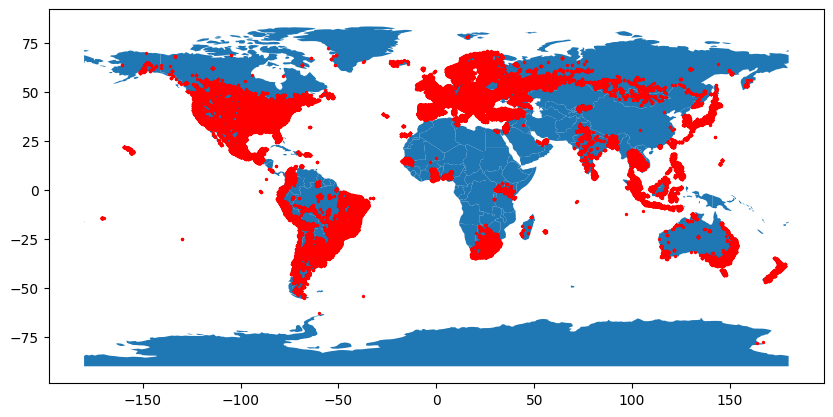

In [23]:
df = pd.read_csv("coordinates_complete.csv", delimiter=',', skiprows=0, low_memory=False)

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=2);

In [5]:
import pygeohash as phg

# We want a geohash precsion of 3 so that we get approximately 32768 cells, which will represent our classes.
df['geohash']=df.apply(lambda coords: phg.encode(coords.latitude, coords.longitude, precision=3), axis=1)


In [1]:

def geohash_to_decimal(geohash):
    base_32 = '0123456789bcdefghjkmnpqrstuvwxyz';
    geohash = geohash.lower()
    return sum([32**idx * base_32.index(char) for idx, char in enumerate(geohash[::-1])])
    
geohash_to_decimal("ezs42")
print(geohash_to_decimal('ezs'))
# 14672002
print(geohash_to_decimal('DRUGGED'))
# 13684424108
print(geohash_to_decimal('ZUR1CH'))
# 1068205424
print(geohash_to_decimal('6'))

14328
13684424108
1068205424
6


In [7]:
df.head()

,filename,latitude,longitude,geometry,geohash
0,"img_-0.00010815079440362751,-51.08998107910156...",-0.000108,-51.089981,POINT (-51.08998 -0.00011),6zg
1,"img_-0.002093230839818716,109.30863952636719.jpg",-0.002093,109.308640,POINT (109.30864 -0.00209),qrv
2,"img_-0.0021491367369890213,-78.45559692382812.jpg",-0.002149,-78.455597,POINT (-78.45560 -0.00215),6rb
3,"img_-0.0023839406203478575,-78.45580291748047.jpg",-0.002384,-78.455803,POINT (-78.45580 -0.00238),6rb
4,"img_-0.0036043361760675907,36.88760757446289.jpg",-0.003604,36.887608,POINT (36.88761 -0.00360),kzf


In [8]:
df['geohash_decimal']=df.apply(lambda x: geohash_to_decimal(x["geohash"]) ,axis=1)
df.head()

,filename,latitude,longitude,geometry,geohash,geohash_decimal
0,"img_-0.00010815079440362751,-51.08998107910156...",-0.000108,-51.089981,POINT (-51.08998 -0.00011),6zg,7151
1,"img_-0.002093230839818716,109.30863952636719.jpg",-0.002093,109.308640,POINT (109.30864 -0.00209),qrv,23291
2,"img_-0.0021491367369890213,-78.45559692382812.jpg",-0.002149,-78.455597,POINT (-78.45560 -0.00215),6rb,6890
3,"img_-0.0023839406203478575,-78.45580291748047.jpg",-0.002384,-78.455803,POINT (-78.45580 -0.00238),6rb,6890
4,"img_-0.0036043361760675907,36.88760757446289.jpg",-0.003604,36.887608,POINT (36.88761 -0.00360),kzf,19438


In [9]:
# Sanity check: Max value should not be higher than 32768
print(df["geohash_decimal"].max())


32132


<AxesSubplot: ylabel='Frequency'>

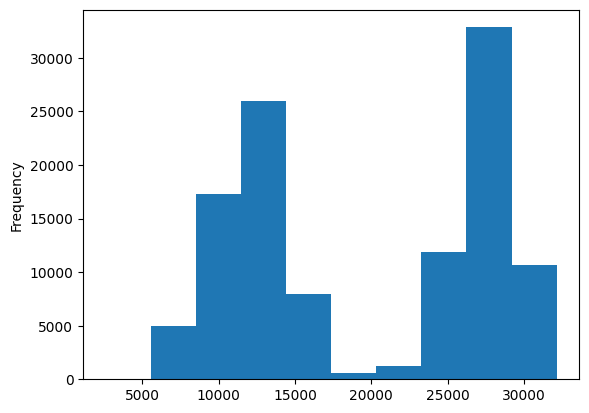

In [10]:
df["geohash_decimal"].plot.hist()

In [11]:
df[["filename", "latitude","longitude", "geohash_decimal"]].to_csv("coordinates_geohash.csv", index=False)

0 torch.Size([3, 512, 2560]) tensor([0, 0, 0,  ..., 0, 0, 0])
1 torch.Size([3, 512, 2560]) tensor([0, 0, 0,  ..., 0, 0, 0])
2 torch.Size([3, 512, 2560]) tensor([0, 0, 0,  ..., 0, 0, 0])
3 torch.Size([3, 512, 2560]) tensor([0, 0, 0,  ..., 0, 0, 0])
4 torch.Size([3, 512, 2560]) tensor([0, 0, 0,  ..., 0, 0, 0])
5 torch.Size([3, 512, 2560]) tensor([0, 0, 0,  ..., 0, 0, 0])
6 torch.Size([3, 512, 2560]) tensor([0, 0, 0,  ..., 0, 0, 0])
7 torch.Size([3, 512, 2560]) tensor([0, 0, 0,  ..., 0, 0, 0])
8 torch.Size([3, 512, 2560]) tensor([0, 0, 0,  ..., 0, 0, 0])
9 torch.Size([3, 512, 2560]) tensor([0, 0, 0,  ..., 0, 0, 0])


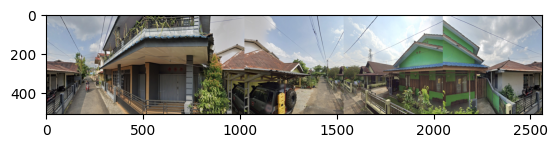

In [39]:
from GeoGuessrDataset import GeoGuessrDataset
import torchvision.transforms as transforms

root_dir = r"C:\Users\valdr\datasets\geoguessr_dataset"

geoguessr_dataset = GeoGuessrDataset(csv_file='./coordinates_geohash.csv',
                                    root_dir=root_dir, transform=transforms.ToTensor())

for i in range(10):
    sample = geoguessr_dataset[i]
    plt.imshow(sample["image"].permute(1, 2, 0))
    print(i, sample['image'].shape, sample['geohash'])


In [41]:
df.head()


,filename,latitude,longitude,geohash_decimal,geometry
0,"img_35.02228927612305,26.065921783447266.jpg",35.022289,26.065922,25476,POINT (26.06592 35.02229)
1,"img_35.02450180053711,10.732959747314453.jpg",35.024502,10.732960,25237,POINT (10.73296 35.02450)
2,"img_35.02614974975586,10.90791130065918.jpg",35.026150,10.907911,25237,POINT (10.90791 35.02615)
3,"img_35.02849197387695,10.908205032348633.jpg",35.028492,10.908205,25237,POINT (10.90821 35.02849)
4,"img_35.04601287841797,10.92099380493164.jpg",35.046013,10.920994,25237,POINT (10.92099 35.04601)


### Filter the data for Europe

The longitude range for Europe is approximately -10° to 40° East. The latitude range for Europe is approximately 35° to 72° North. These ranges are not exact and can vary depending on how Europe is defined geographically

In [18]:
df_europe = df[(df["latitude"] <= 72.0) & (df["latitude"] >= 35.0) & (df["longitude"] <= 40.0) & (df["longitude"] >= -10.0)]


Write the data for Europe to a csv:

In [21]:
df_europe[["filename", "latitude","longitude", "geohash_decimal"]].to_csv("coordinates_europe.csv", index=False)

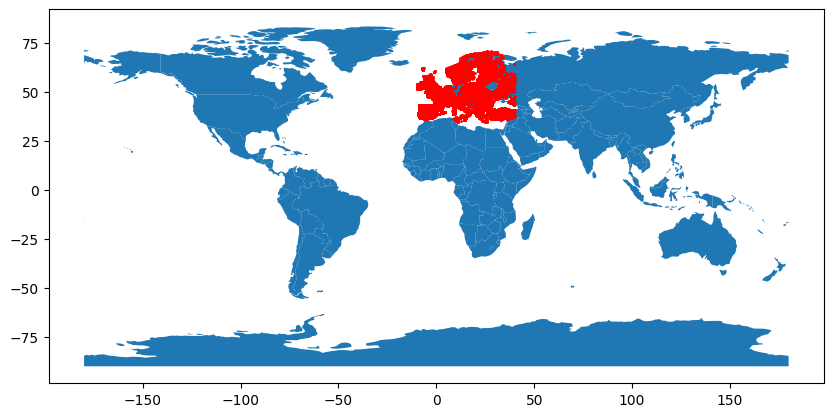

In [24]:
df = pd.read_csv("coordinates_europe.csv", delimiter=',', skiprows=0, low_memory=False)

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=1);

### Remove the geohashes which don't have samples

In [27]:
geohashes_with_samples = df_europe["geohash_decimal"].unique()
len(geohashes_with_samples)

655

In [32]:
geohash_map = { geo: i for i, geo in enumerate(geohashes_with_samples)}

In [35]:
df_europe["geo_code"] = df_europe.apply(lambda geohash: geohash_map[geohash["geohash_decimal"]], axis=1)

In [36]:
df_europe

,filename,latitude,longitude,geometry,geohash,geohash_decimal,geo_code
34077,"img_35.02228927612305,26.065921783447266.jpg",35.022289,26.065922,POINT (26.06592 35.02229),sw4,25476,0
34087,"img_35.02450180053711,10.732959747314453.jpg",35.024502,10.732960,POINT (10.73296 35.02450),snp,25237,1
34098,"img_35.02614974975586,10.90791130065918.jpg",35.026150,10.907911,POINT (10.90791 35.02615),snp,25237,1
34108,"img_35.02849197387695,10.908205032348633.jpg",35.028492,10.908205,POINT (10.90821 35.02849),snp,25237,1
34173,"img_35.04601287841797,10.92099380493164.jpg",35.046013,10.920994,POINT (10.92099 35.04601),snp,25237,1
...,...,...,...,...,...,...,...
112763,"img_70.74160766601562,24.535266876220703.jpg",70.741608,24.535267,POINT (24.53527 70.74161),us9,27401,652
112764,"img_70.98162078857422,25.972938537597656.jpg",70.981621,25.972939,POINT (25.97294 70.98162),usd,27404,653
112765,"img_70.98342895507812,26.029788970947266.jpg",70.983429,26.029789,POINT (26.02979 70.98343),usd,27404,653
112766,"img_70.99128723144531,25.967439651489258.jpg",70.991287,25.967440,POINT (25.96744 70.99129),usd,27404,653


In [49]:
import shutil

for name in df_europe["filename"]:
    src = os.path.join(r"C:\Users\valdr\datasets\geoguessr-data\geoguessr_complete", name) 
    dst = os.path.join(r"C:\Users\valdr\datasets\geoguessr-data\geoguessr_europe", name)
    shutil.copyfile(src, dst)

